In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

import ipywidgets as widgets
from IPython.display import display

Definicja parametrów

In [48]:
ksi = 2.3
omega_0 = 0.49

ksi_slider = widgets.FloatSlider(
    value=2.3,      # Wartość początkowa
    min=-5.0,       # Minimum
    max=5.0,        # Maksimum
    step=0.01,       # Krok
    description='Ksi:',
    continuous_update=False # Aktualizuj tylko po puszczeniu myszki (opcjonalne)
)

omega_slider = widgets.FloatSlider(
    value=0.49,     # Wartość początkowa
    min=-5.0,       # Minimum
    max=5.0,        # Maksimum
    step=0.01,      # Krok
    description='Omega 0:',
    continuous_update=False # Aktualizuj tylko po puszczeniu myszki (opcjonalne)
)

# Wyświetlenie suwaka
display(ksi_slider)
display(omega_slider)

FloatSlider(value=2.3, continuous_update=False, description='Ksi:', max=5.0, min=-5.0, step=0.01)

FloatSlider(value=0.49, continuous_update=False, description='Omega 0:', max=5.0, min=-5.0, step=0.01)

Macierz dynamiki (Macierz Frobeniusa)

In [49]:
ksi = ksi_slider.value
omega_0 = omega_slider.value

F = np.array([[0, 1], [-omega_0**2, -2*ksi*omega_0]])

Wyznaczamy wartości i wektory własne

In [50]:
eigenvalues, eigenvectors = np.linalg.eig(F)

WYKRES: Wartości własne

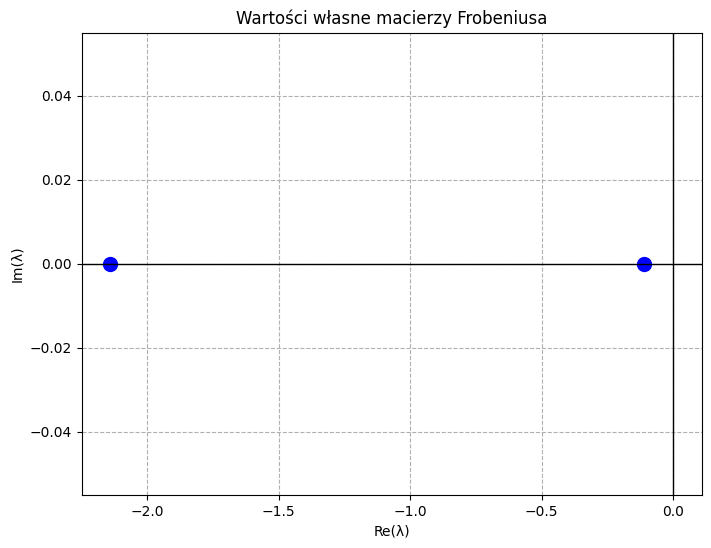

In [51]:
plt.figure(figsize=(8, 6))
for l in eigenvalues:
    plt.plot(l.real, l.imag, 'bo', markersize=10)

plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.grid(True, linestyle='--')
plt.xlabel("Re(λ)")
plt.ylabel("Im(λ)")
plt.title("Wartości własne macierzy Frobeniusa")
plt.show()

WYKRES: Portret fazowy

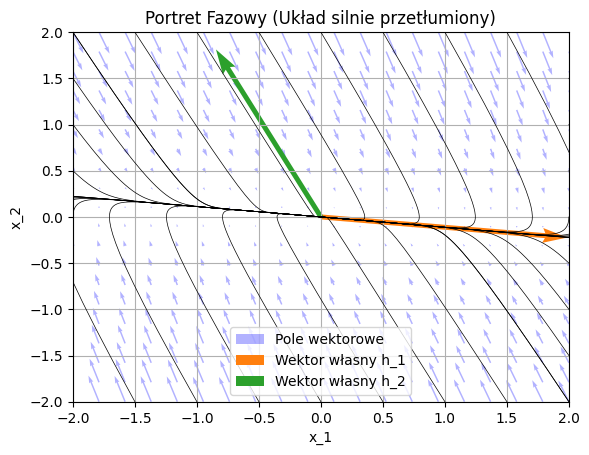

In [52]:
# Pole wektorowe
x1_range = np.linspace(-2, 2, 20)
x2_range = np.linspace(-2, 2, 20)
X1, X2 = np.meshgrid(x1_range, x2_range)
dX1 = X2
dX2 = -omega_0**2 * X1 - 2*ksi*omega_0 * X2

plt.quiver(X1, X2, dX1, dX2, color='blue', alpha=0.3, label="Pole wektorowe")

# Warunki początkowe (brzegi układu)
X0 = []
# Punkty na krawędziach
edge = np.linspace(-2, 2, 9)
for e in edge:
    X0.append([e, 2])   # góra
    X0.append([e, -2])  # dół
    X0.append([-2, e])  # lewo
    X0.append([2, e])   # prawo

# Symulacja trajektorii
t = np.linspace(0, 100, 1000)
for x0 in X0:
    # Rozwiązanie równania różniczkowego dx/dt = F * x
    sol = odeint(lambda x, t: F @ x, x0, t)
    plt.plot(sol[:, 0], sol[:, 1], 'k-', lw=0.5)

# Zaznaczamy wektory własne (jako proste/kierunki)
for i in range(len(eigenvalues)):
    v = eigenvectors[:, i]
    # Rysujemy wektor wychodzący ze środka
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=0.5, 
               color=f'C{i+1}', width=0.01, label=f"Wektor własny h_{i+1}")

plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("Portret Fazowy (Układ silnie przetłumiony)")
plt.legend()
plt.grid(True)
plt.show()